In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv.CascadeClassifier('../data/haarcascades/haarcascade_frontalface_alt2.xml')

img = cv.imread("../img/face_1.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags = (cv.CASCADE_SCALE_IMAGE +
                     cv.CASCADE_DO_CANNY_PRUNING +
                     cv.CASCADE_FIND_BIGGEST_OBJECT +
                     cv.CASCADE_DO_ROUGH_SEARCH))
if len(faces) >= 1:
    tempImg = img.copy()
    maskShape = (img.shape[0], img.shape[1], 1)
    mask = np.full(maskShape, 0, dtype=np.uint8)
    window_size = 23
    for (x,y,w,h) in faces:
#         tempImg[y:y + h, x:x + w] = cv.blur(tempImg[y:y + h, x:x + w], (23, 23))
        tempImg[:y, :] = cv.blur(tempImg[:y, :], (window_size, window_size))
        tempImg[y+h:, :] = cv.blur(tempImg[y+h:, :], (window_size, window_size))
        tempImg[:, :x] = cv.blur(tempImg[:, :x], (window_size, window_size))
        tempImg[:, x+w:] = cv.blur(tempImg[:, x+w:], (window_size, window_size))
        cv.circle(tempImg, (int((x + x + w) / 2), int((y + y + h) / 2)), int(h / 2), (0, 255, 0), 5)
        cv.circle(mask, (int((x + x + w) / 2), int((y + y + h) / 2)), int(h / 2), (255), -1)
    mask_inv = cv.bitwise_not(mask)
    img1_bg = cv.bitwise_and(tempImg, tempImg, mask=mask_inv)
    img2_fg = cv.bitwise_and(tempImg, tempImg, mask=mask)
    dst = cv.add(img1_bg, img2_fg)

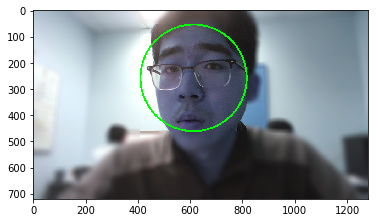

In [30]:
imgplot = plt.imshow(tempImg)

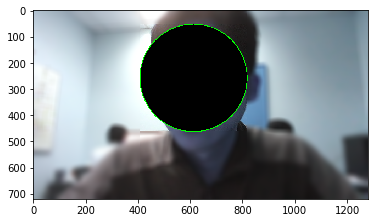

In [31]:
imgplot = plt.imshow(img1_bg)

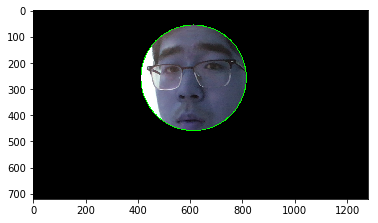

In [32]:
imgplot = plt.imshow(img2_fg)

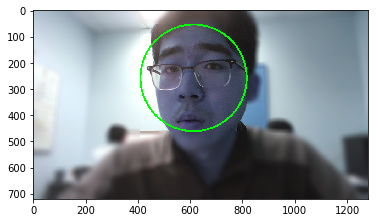

In [33]:
imgplot = plt.imshow(dst)

In [19]:
faces = np.array([[12,14,10,10],[1,1,70,70],[23,43,50,50]])
np.array(list(faces))

array([[12, 14, 10, 10],
       [ 1,  1, 70, 70],
       [23, 43, 50, 50]])

In [20]:
np.array(sorted(faces,key=lambda x: x[2], reverse=True))    

array([[ 1,  1, 70, 70],
       [23, 43, 50, 50],
       [12, 14, 10, 10]])

In [21]:
(x,y,w,h) = faces[0]

In [22]:
print(x,y,w,h)

12 14 10 10
